<Axes: >

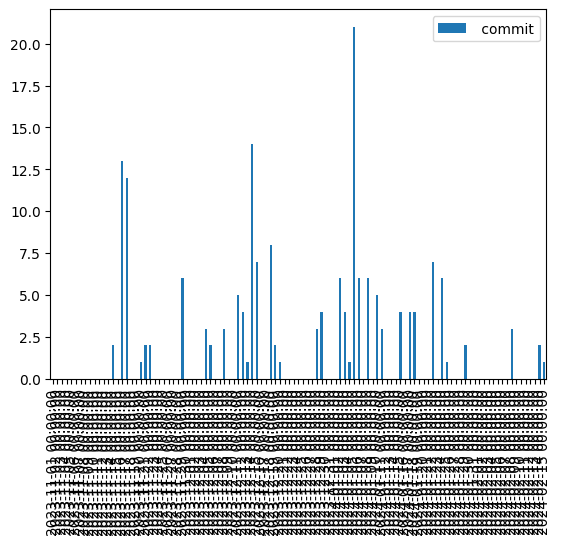

In [16]:
from os import path
import pandas as pd


from matplotlib import pyplot as plt

datafile = path.join("../data", "bht2.gitactivity")

_df = pd.read_csv(datafile, parse_dates=True, sep=";", index_col="date")

_df_agg = _df.groupby("date").agg("sum")

_df_agg.sort_values("date", inplace=True)


start_date = _df_agg.index[0]
end_date = _df_agg.index[-1]

new_index = pd.date_range(start=start_date, end=end_date, freq="d")

_df_reindexed = _df_agg.reindex(new_index)

_df_cutted = _df_reindexed.truncate(before="2023-11-01")


_df_cutted.plot.bar()